In [ ]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [ ]:
df=pd.read_csv(r"C:\Users\mates\Downloads\KwhConsumptionBlower78_3.csv",parse_dates=['TxnDate'])
print(df.shape)
df.head()

(1748, 4)


,Unnamed: 0,TxnDate,TxnTime,Consumption
0,0,2022-02-01,14:41:48,1.016
1,1,2022-02-01,17:28:44,0.928
2,2,2022-02-01,19:51:07,0.988
3,3,2022-02-01,07:26:39,1.126
4,4,2022-02-01,05:20:47,0.886


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   1748 non-null   int64         
 1   TxnDate      1748 non-null   datetime64[ns]
 2   TxnTime      1748 non-null   object        
 3   Consumption  1748 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 54.8+ KB


In [6]:
df['Datetime']=pd.to_datetime(df['TxnDate'])

In [7]:
df=df.groupby('Datetime').sum('Consumption').drop('Unnamed: 0',axis=1)
df.head(2)

,Consumption
Datetime,
2022-02-01,68.708
2022-02-02,67.944


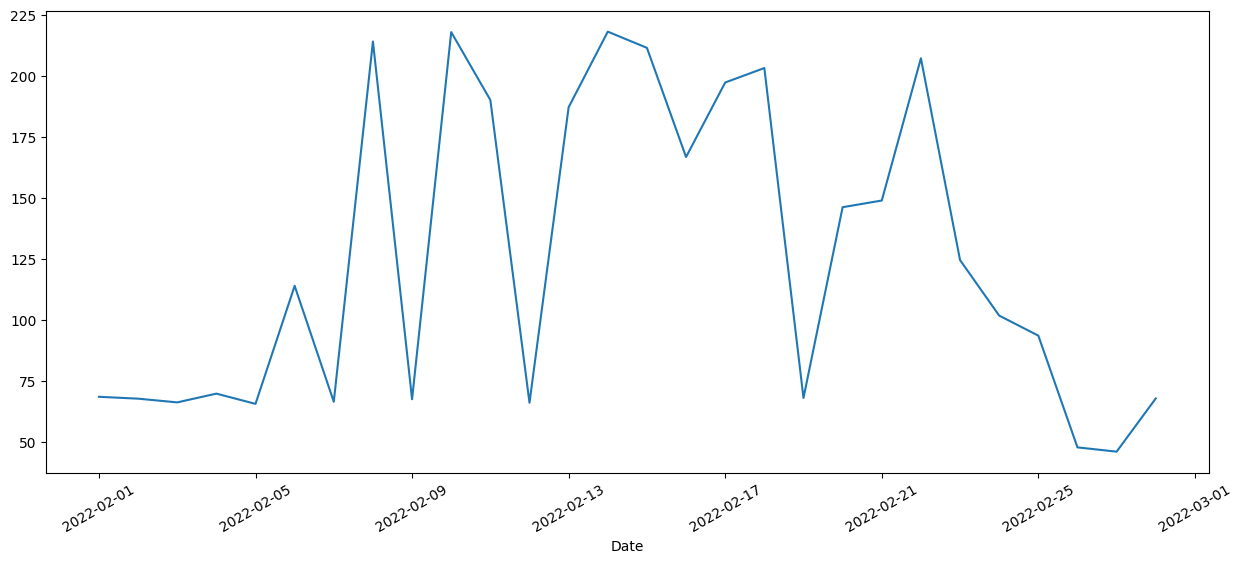

In [8]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.xlabel("Date")
plt.xticks(rotation=30)
plt.show()

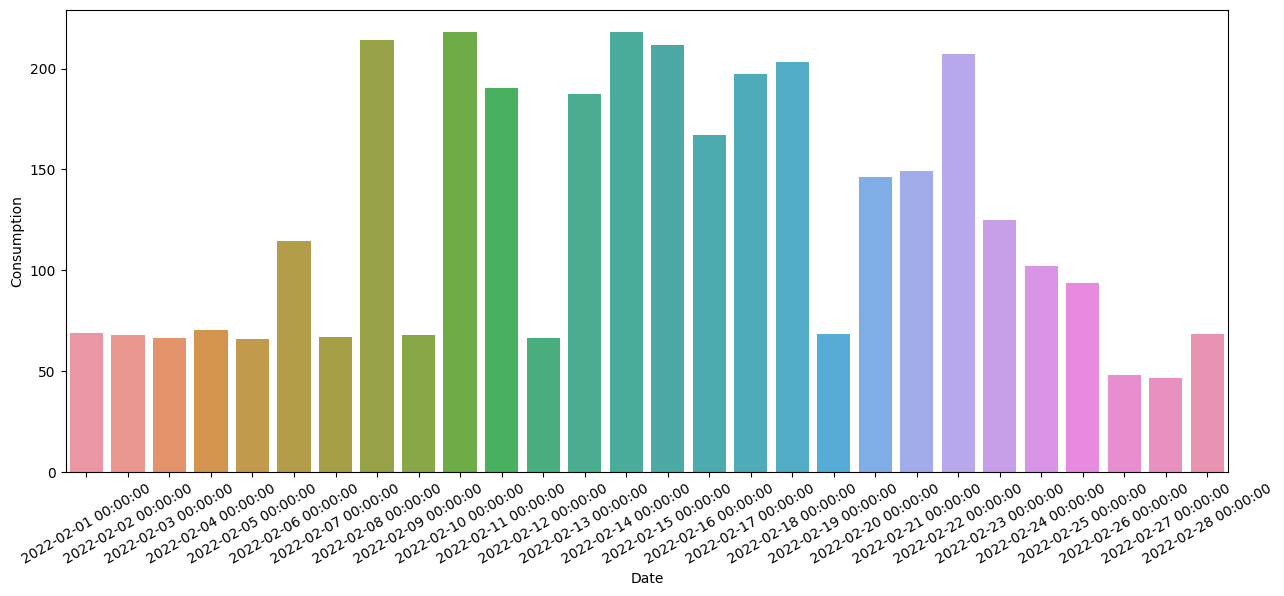

In [9]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=df.index,y="Consumption")
plt.xlabel("Date")
plt.xticks(rotation=30)
plt.show()

In [10]:
rolling_mean_df=df.rolling(window=4).mean()

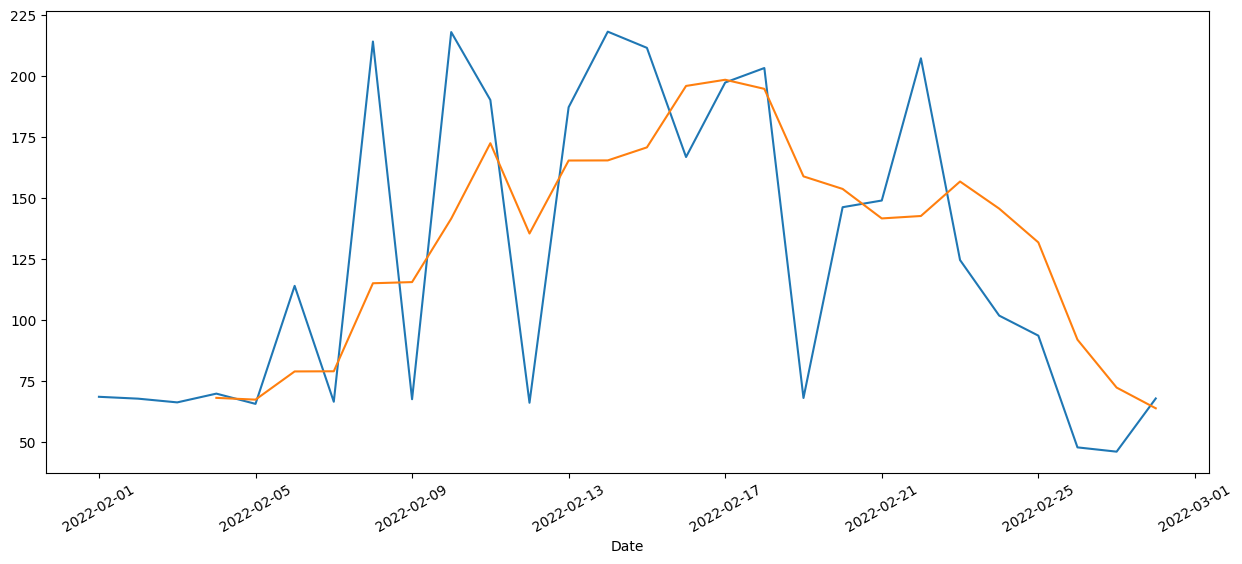

In [11]:
plt.figure(figsize=(15,6))
plt.plot(df)
plt.plot(rolling_mean_df)
plt.xlabel("Date")
plt.xticks(rotation=30)
plt.show()

In [12]:
df=df.asfreq('D')

In [13]:
simp_smoothing=SimpleExpSmoothing(df)
simp_smoothing_d=simp_smoothing.fit(smoothing_level=0.2,optimized=False)
exp_smoothing=ExponentialSmoothing(df)
exp_smoothing_d=exp_smoothing.fit(smoothing_level=0.2,optimized=False)

In [14]:
holt_normal=Holt(df).fit()
holt_exp=Holt(df,exponential=True).fit()

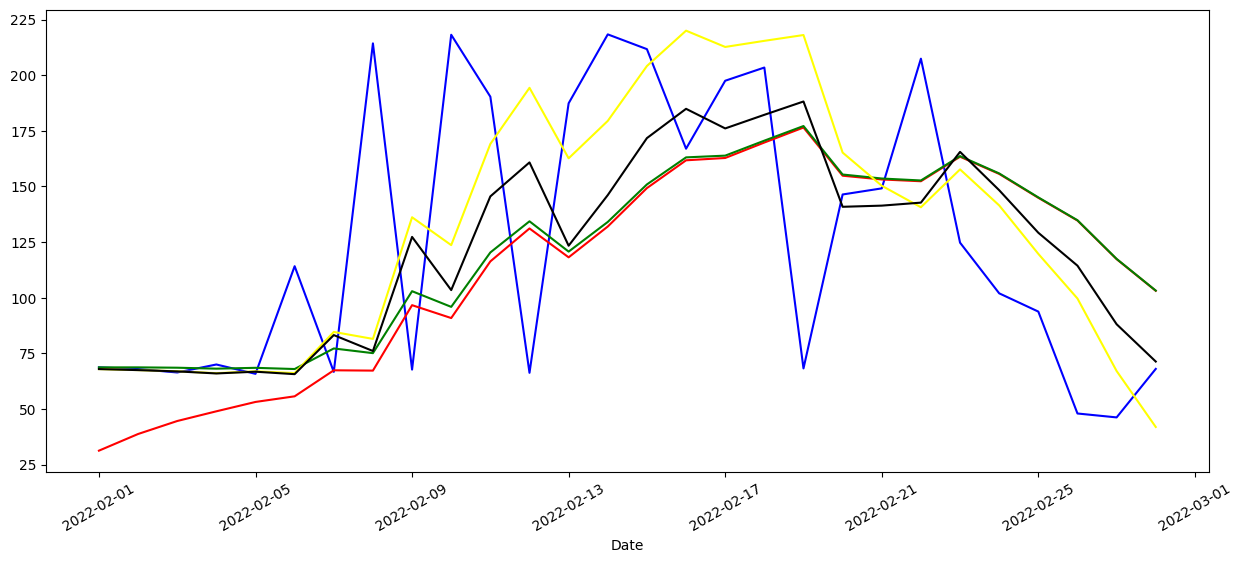

In [15]:
plt.figure(figsize=(15,6))
plt.plot(df,color='blue')
plt.plot(exp_smoothing_d.fittedvalues,color='red')
plt.plot(simp_smoothing_d.fittedvalues,color='green')
plt.plot(holt_normal.fittedvalues,color='yellow')
plt.plot(holt_exp.fittedvalues,color='black')
plt.xlabel("Date")
plt.xticks(rotation=30)
plt.show()

In [16]:
mul_result=seasonal_decompose(df,model='multiplicative',period=7)

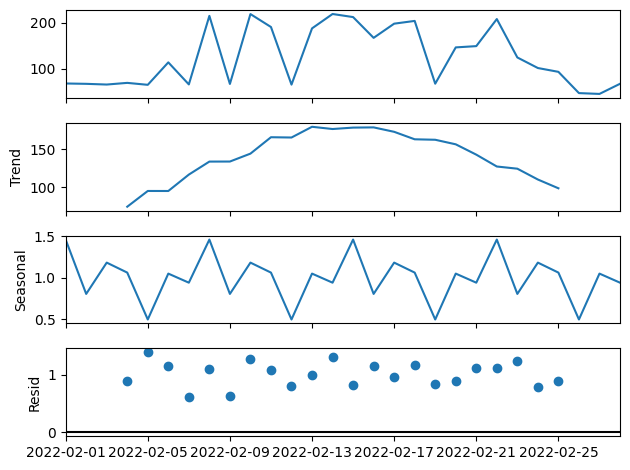

In [17]:
mul_result.plot()
plt.show()

In [18]:
adfuller_check=adfuller(df['Consumption'],autolag='AIC')
print(f"p-vlue: {adfuller_check[1]}")

p-vlue: 0.8211254759286989


In [19]:
df_roll=df.rolling(window=4).mean().dropna()
adfuller_check=adfuller(df_roll,autolag='AIC')
print(f"p-vlue: {adfuller_check[1]}")

p-vlue: 0.03341273514524551


In [20]:
model = auto_arima(df['Consumption'], seasonal=True,m=7, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=314.881, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=314.103, Time=0.31 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=315.160, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=358.267, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=313.918, Time=0.10 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=313.728, Time=0.25 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=315.500, Time=0.44 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=315.474, Time=0.29 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=317.470, Time=0.36 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=314.736, Time=0.13 sec
 ARIMA(2,0,0)(0,0,1)[7] intercept   : AIC=311.110, Time=0.33 sec
 ARIMA(2,0,0)(0,0,0)[7] intercept   : AIC=313.144, Time=0.14 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=313.098, Time=0.54 sec
 ARIMA(2,0,0)(0,0,2)[7] intercept   : AIC=313.087, 

In [21]:
best_model = ARIMA(df, order=(3, 0, 0),seasonal_order=(1, 0, 0, 7))
best_model_fit = best_model.fit()

In [22]:
best_model_fit.forecast(10)

2022-03-01    100.303526
2022-03-02     61.974852
2022-03-03     60.556230
2022-03-04     59.441010
2022-03-05     42.029029
2022-03-06     44.916728
2022-03-07     56.209055
2022-03-08     72.176789
2022-03-09     57.816050
2022-03-10     58.796994
Freq: D, Name: predicted_mean, dtype: float64

In [23]:
best_model_fit_gf=best_model_fit.get_forecast(steps=10)
forecast_mean = best_model_fit_gf.predicted_mean
forecast_conf_int = best_model_fit_gf.conf_int()
forecast_conf_int

,lower Consumption,upper Consumption
2022-03-01,5.175555,195.431497
2022-03-02,-34.029075,157.978779
2022-03-03,-41.064579,162.177039
2022-03-04,-49.010411,167.892430
2022-03-05,-68.279715,152.337774
2022-03-06,-68.297572,158.131028
2022-03-07,-59.070550,171.488660
2022-03-08,-57.007276,201.360854
2022-03-09,-73.385628,189.017728
2022-03-10,-75.591720,193.185708


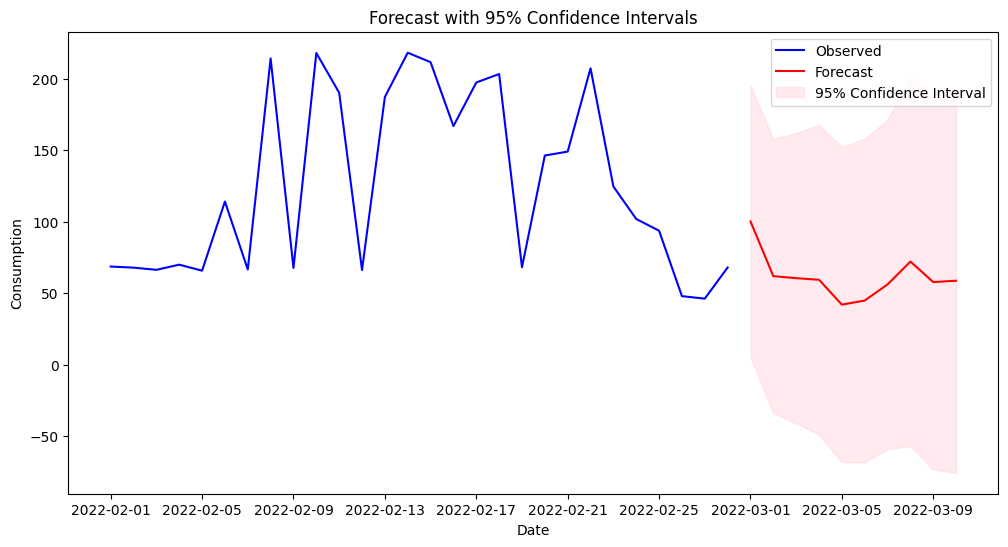

In [ ]:
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')

forecast_df = pd.DataFrame({
    'Forecast': forecast_mean,
    'Lower Confidence': forecast_conf_int.iloc[:, 0],
    'Upper Confidence': forecast_conf_int.iloc[:, 1]
}, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Consumption'], label='Observed', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], color='red', label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['Lower Confidence'], forecast_df['Upper Confidence'],
                 color='pink', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Forecast with 95% Confidence Intervals')
plt.legend()
plt.show()